# Random Forest

We will build:
 - Random Forest 
 - XG Boost

Start by importing libraries

In [79]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 55 ## You will pass it to every sklearn call to ensure reproducibility

# 1. Loading the Dataset

In [64]:
# Load the dataset using pandas
input = pd.read_feather('C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/data/input.feather')
output = pd.read_feather('C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/data/output.feather')

In [84]:
output

,number_of_lands
0,33
1,25
2,24
3,24
4,21
...,...
9294,16
9295,13
9296,16
9297,17


# Splitting the Dataset

Split our dataset into train and test datasets. We use the function `train_test_split` from Scikit-learn

In [65]:
X_train, X_test, y_train, y_test = train_test_split(input, output, train_size = 0.8, random_state = RANDOM_STATE)

In [66]:
print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')

train samples: 7439
test samples: 1860


# 4. Building the Random Forest

In [67]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]
min_samples_leaf_list = [2, 5, 10, 25, 50, 100]

C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\3419038554.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\3419038554.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\3419038554.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\3419038554.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

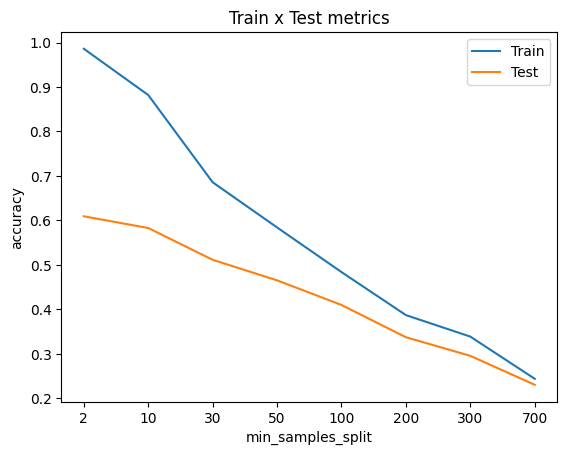

In [68]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\502522874.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\502522874.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\502522874.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\502522874.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

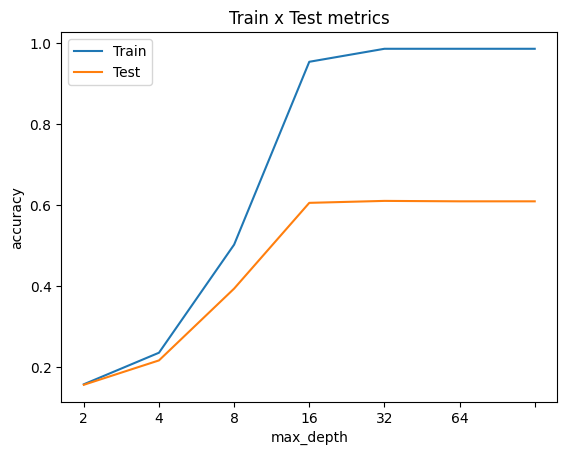

In [69]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\1359082543.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\1359082543.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\1359082543.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\1359082543.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

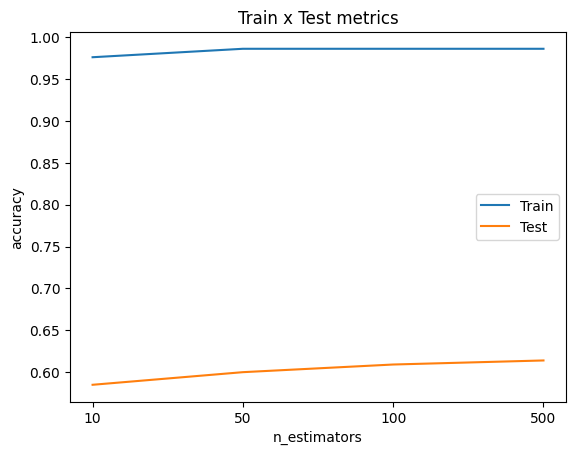

In [70]:
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\24887165.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\24887165.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\24887165.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_state = RANDOM_STATE).fit(X_train,y_train)
C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\24887165.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

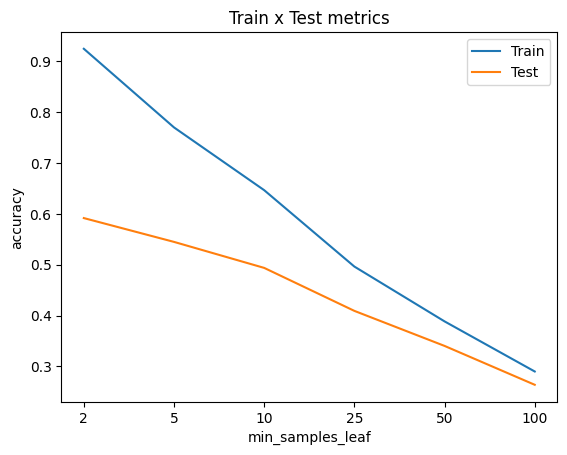

In [71]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_leaf in min_samples_leaf_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_leaf_list )),labels=min_samples_leaf_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

Let's then fit a random forest with the following parameters:

 - max_depth: 32
 - min_samples_split: 2
 - n_estimators: 100

In [80]:
# Define the hyperparameter search space
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

print("Best parameters:", best_params)

# Train the random forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
score = best_rf.score(X_test, y_test)
print("Test set accuracy:", score)

c:\Users\Peter\Documents\GitHub\MTG-Land-Recommender\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Peter\Documents\GitHub\MTG-Land-Recommender\venv\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}


C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\2026374909.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X_train, y_train)


Test set accuracy: 0.6102150537634409


In [76]:
random_forest_model = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 32, 
                                             min_samples_split = 2).fit(X_train,y_train)

C:\Users\Peter\AppData\Local\Temp\ipykernel_28908\9762461.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  min_samples_split = 2).fit(X_train,y_train)


In [77]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9860
Metrics test:
	Accuracy score: 0.6091


## 4.3 XGBoost

Now, the last model you will test in this lab is the Gradient Boosting model, called XGBoost. As you've seen in the lectures, the boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fitted subsequently to minimize the error. 

The parameters that this model comprises is the same as the parameters for any decision tree, plus some others, such as the learning rate, which is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

One interesting thing about the XGBoost is that it allows, during the fit, to pass a list evaluation datasets of the form `(X_val,y_val)`, where on each iteration, it measures the cost (or evaluation metric) on the evaluation datasets so that once the cost (or metric) stops to descrease for a number of rounds (called early_stopping_rounds), the training will stop. This is how we can automatically control how many estimators is enough, and how we can avoid overfitting due to too many estimators.

First, let's define a subset of our training set (we should not use the test set here).

In [29]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [30]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

You can then set a large number of estimators, because you can stop if the cost function stops decreasing.

In [31]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 50)
# Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets. The parameter 
# early_stopping_rounds is the number of iterations that it will wait to check if the cost function decreased or not.
# If not, it will stop and get the iteration that returned the lowest metric on the eval set.

[0]	validation_0-mlogloss:3.45350
[1]	validation_0-mlogloss:3.27211
[2]	validation_0-mlogloss:3.12754


c:\Users\Peter\Documents\GitHub\MTG-Land-Recommender\venv\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-mlogloss:3.00761
[4]	validation_0-mlogloss:2.91181
[5]	validation_0-mlogloss:2.82442
[6]	validation_0-mlogloss:2.74699
[7]	validation_0-mlogloss:2.67675
[8]	validation_0-mlogloss:2.61993
[9]	validation_0-mlogloss:2.56507
[10]	validation_0-mlogloss:2.51417
[11]	validation_0-mlogloss:2.46879
[12]	validation_0-mlogloss:2.42806
[13]	validation_0-mlogloss:2.38699
[14]	validation_0-mlogloss:2.35526
[15]	validation_0-mlogloss:2.32074
[16]	validation_0-mlogloss:2.28909
[17]	validation_0-mlogloss:2.26108
[18]	validation_0-mlogloss:2.23493
[19]	validation_0-mlogloss:2.20925
[20]	validation_0-mlogloss:2.18459
[21]	validation_0-mlogloss:2.16306
[22]	validation_0-mlogloss:2.14119
[23]	validation_0-mlogloss:2.12231
[24]	validation_0-mlogloss:2.10473
[25]	validation_0-mlogloss:2.08759
[26]	validation_0-mlogloss:2.07235
[27]	validation_0-mlogloss:2.05686
[28]	validation_0-mlogloss:2.04245
[29]	validation_0-mlogloss:2.02676
[30]	validation_0-mlogloss:2.01468
[31]	validation_0-mlogloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

As you can see, even though you passed 500 estimators to fit, the algorithm only fitted 66 because the log-loss used to metrify the training rounds started to increase. In fact, the number of estimators is even less than 66. If you take a closeer look to the metrics, you see that with 16 fitted trees, we achieved the minimum value of the log-loss, and in fact, this is the number of fitted trees in the final model:

In [32]:
xgb_model.best_iteration

244

In [33]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8951
Metrics test:
	Accuracy score: 0.5790


In [92]:
new_example = np.array([1, 5, 0, 21, 32, 4, 1, 0, 4, 4, 0, 0, 0, 0, 0, 7, 3, 4, 4, 0])
new_example = new_example.reshape(20,1)
new_example

array([[ 1],
       [ 5],
       [ 0],
       [21],
       [32],
       [ 4],
       [ 1],
       [ 0],
       [ 4],
       [ 4],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 7],
       [ 3],
       [ 4],
       [ 4],
       [ 0]])

In [93]:
print(random_forest_model.predict(new_example.T))

[20]


c:\Users\Peter\Documents\GitHub\MTG-Land-Recommender\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


You can see that RandomForest achieved the best accuracy, but the results overall were close. And note that we got a very close test metric with XGBoost compared to RandomForest, and we didn't even performed any hyperparameter search! The advantage of XGBoost is that it is faster than the Random Forest and also it has more parameters, therefore you are able to fine-tune the model to achieve even better results.


Congratulations, you have learned how to use Decision Tree, Random Forest from the scikit-learn library and XGBoost!